In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


## import fashion mnist dataset

In [0]:
batch_size = 256
num_classes = 10
epochs = 8
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


## preprocessing the data



In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
y_test_label =y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## build cnn model

 CNN 一樣是由好幾層的 Neuron layer 所構成 : 
 <br>卷積層 (Convolution) <br>池化層 (Pooling) <br>平坦層 (Flatten) <br>隱藏層 (Hidden) <br>輸出層 (Output)
 <br>Sequential 是一個多層模型，可以透過 add() 函式將一層一層 layer 加上去
 <br>因此步驟為下 : 
 ### Conv2D : Convolution卷積層
加上一層 Convolution2D ，32為kernal數量，kernel size 為 2x2，<br>並且使用 relu 作為激活函式，input shape代表輸出層是幾成幾，<br>且只有第一層需要
找出feature map 中的最大值，然後以2x2輸出
 <br>好處:
1.   縮小 feature map 的尺寸，減少需要訓練的參數，避免 overfitting 的可能
2.   依舊可保持影像中的主要特徵


 ### Flatten : 平坦層
把二維矩陣變成一維陣列
### Dropout
dropout是指在訓練程中，對於神經網路單元，按照一定的機率暫時從網路中drop掉
<br>優點:
1.  可防止overfitting
2.  減少訓練時間




In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## train model

In [0]:
#將訓練結果存到history中，後面才可以畫圖
history = model.fit(x_train, y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1,
         validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 9s 151us/step - loss: 0.7306 - acc: 0.7291 - val_loss: 0.4106 - val_acc: 0.8473
Epoch 2/8
60000/60000 [==============================] - 3s 55us/step - loss: 0.4243 - acc: 0.8484 - val_loss: 0.3441 - val_acc: 0.8727
Epoch 3/8
60000/60000 [==============================] - 3s 56us/step - loss: 0.3618 - acc: 0.8713 - val_loss: 0.3063 - val_acc: 0.8902
Epoch 4/8
60000/60000 [==============================] - 3s 57us/step - loss: 0.3223 - acc: 0.8851 - val_loss: 0.2826 - val_acc: 0.8966
Epoch 5/8
60000/60000 [==============================] - 3s 57us/step - loss: 0.2959 - acc: 0.8938 - val_loss: 0.2624 - val_acc: 0.9020
Epoch 6/8
60000/60000 [==============================] - 3s 56us/step - loss: 0.2778 - acc: 0.9001 - val_loss: 0.2480 - val_acc: 0.9096
Epoch 7/8
60000/60000 [==============================] - 3s 57us/step - loss: 0.2587 

## (c) evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 55us/step
Test loss: 0.2366912540435791
Test accuracy: 0.9145


## (d) model summary

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

## draw plot

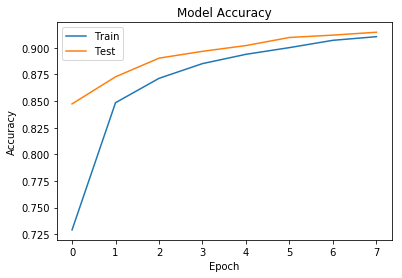

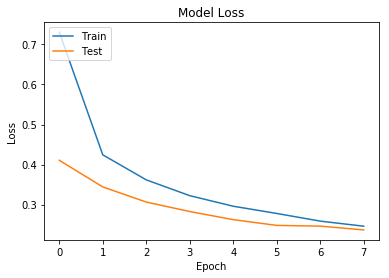

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

## confusion matrix

In [0]:
import numpy as np
import pandas as pd

predicted = model.predict(x_test)

predicted_class = np.argmax(predicted, axis=1)

pd.crosstab(y_test_label, predicted_class, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,808,0,13,39,4,1,134,0,1,0
1,0,977,0,19,1,0,2,0,1,0
2,13,0,865,10,49,0,63,0,0,0
3,1,2,9,958,10,0,20,0,0,0
4,1,0,25,53,858,0,63,0,0,0
5,0,0,0,0,0,991,0,7,0,2
6,61,0,47,43,60,0,785,0,4,0
7,0,0,0,0,0,7,0,979,0,14
8,3,0,3,6,2,2,5,2,977,0
